In [1]:
import pandas as pd 
import numpy as np
import csv
from collections import Counter
from collections import defaultdict
import string
import nltk
from nltk import tokenize
import re
%matplotlib inline
import matplotlib.pyplot as plt

# Exploratory Data

## Log Word Rank

In [2]:
agree_res = pd.read_csv('agree_wordcounts.csv')
disagree_res = pd.read_csv('disagree_wordcounts.csv')

In [3]:
agree_counter = Counter(agree_res.set_index('Word')['Frequency'].to_dict())
disagree_counter = Counter(disagree_res.set_index('Word')['Frequency'].to_dict())

A) 


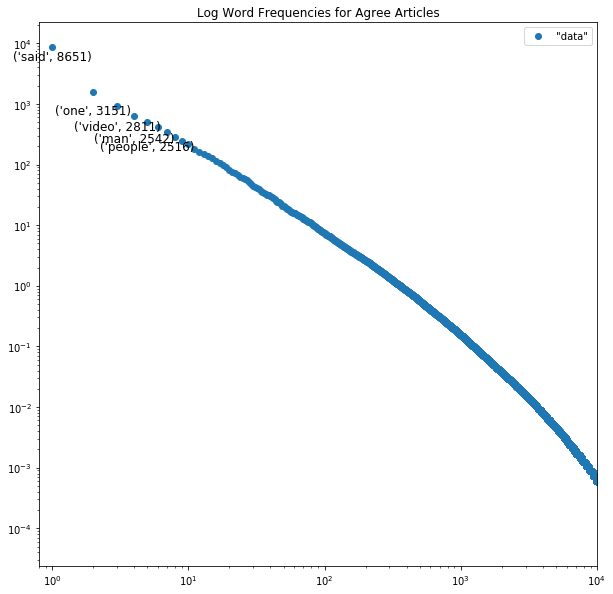

In [4]:
# For agree articles
top15 = agree_counter.most_common(5)
top7000 = agree_counter.most_common(7000)

m = list(agree_counter.values())
r = 1+np.arange(len(m))
list.sort(m, reverse=True)

plt.figure(figsize=(10,10))
plt.loglog(r,m/r,'o')
plt.xlim(.8,1e4)

for x,y,w in zip(r,m/r,top15):
    plt.text(x,.1*y**1.2,w,ha='center', fontsize=12)
print('A) ') 
plt.legend(['"data"','"fit"']);
plt.title('Log Word Frequencies for Agree Articles');

A) 


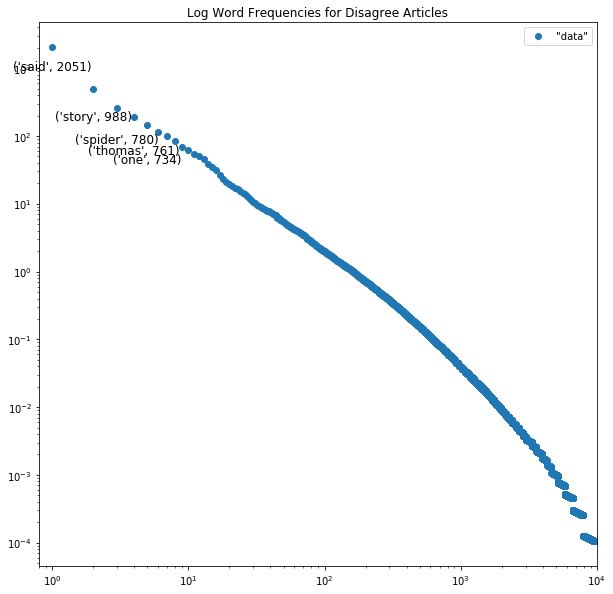

In [5]:
#for diagree articles
dis_top15 = disagree_counter.most_common(5)
dis_top7000 = disagree_counter.most_common(7000)

m = list(disagree_counter.values())
r = 1+np.arange(len(m))
list.sort(m, reverse=True)

plt.figure(figsize=(10,10))
plt.loglog(r,m/r,'o')
plt.xlim(.8,1e4)

for x,y,w in zip(r,m/r,dis_top15):
    plt.text(x,.1*y**1.2,w,ha='center', fontsize=12)
print('A) ') 
plt.legend(['"data"','"fit"']);
plt.title('Log Word Frequencies for Disagree Articles');

## Top Word Frequencies

In [6]:
agree_top25 = agree_counter.most_common(25)

agree_x = [agree_top25[i][0] for i in range(len(agree_top25))]
agree_y = [agree_top25[i][1] for i in range(len(agree_top25))]

Text(0.5,1,'Word Frequencies for Agree Articles')

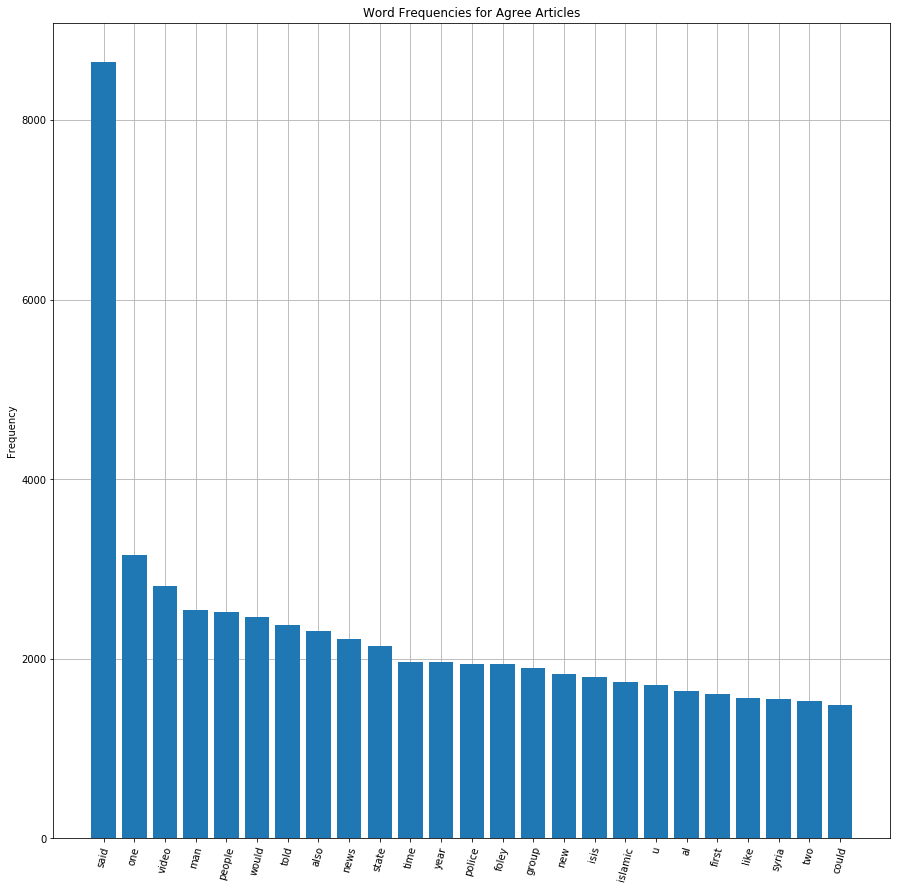

In [7]:
plt.figure(figsize=(15,15))
plt.bar(agree_x,agree_y, zorder=3)
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.grid(zorder=0)
plt.title('Word Frequencies for Agree Articles')

Text(0.5,1,'Word Frequencies for Disgree Articles')

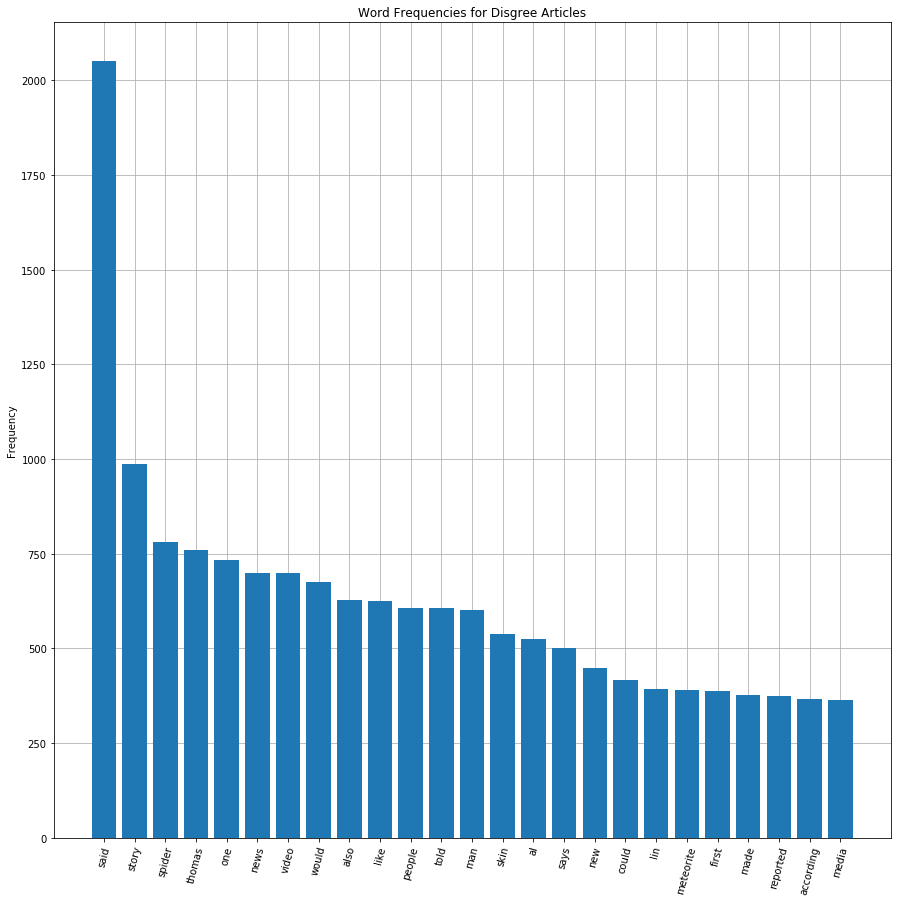

In [8]:
disagree_top25 = disagree_counter.most_common(25)

disagree_x = [disagree_top25[i][0] for i in range(len(disagree_top25))]
disagree_y = [disagree_top25[i][1] for i in range(len(disagree_top25))]

plt.figure(figsize=(15,15))
plt.bar(disagree_x,disagree_y, zorder=3)
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.grid(zorder=0)
plt.title('Word Frequencies for Disgree Articles')

## Distribution of Word Lengths

In [9]:
agree_dict = dict(agree_counter)
disagree_dict = dict(disagree_counter)

agree_words = list(agree_dict.keys())

agree_word_len = [len(str(word)) for word in agree_words]

print(max(agree_word_len))

agree_words_freq = list(agree_dict.values())

agree_word_length = dict(zip(agree_words,agree_word_len))

agree_length = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 
                11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0,
                21:0, 22:0, 23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0, 30:0,
                31:0, 32:0, 33:0, 34:0,35:0}
for ele in agree_dict:
    agree_length[agree_word_length[ele]] += agree_dict[ele]

35


In [14]:
from math import floor, ceil

def find_weighted_median(d):
    median_location = sum(d.values()) / 2
    lower_location = floor(median_location)
    upper_location = ceil(median_location)
    lower = None
    upper = None
    running_total = 0
    for val, count in d.items():
        if not lower and running_total <= lower_location <= running_total + count:
            lower = val
        if running_total <= upper_location <= running_total + count:
            upper = val
        if lower and upper:
            return (lower + upper) / 2
        running_total += count

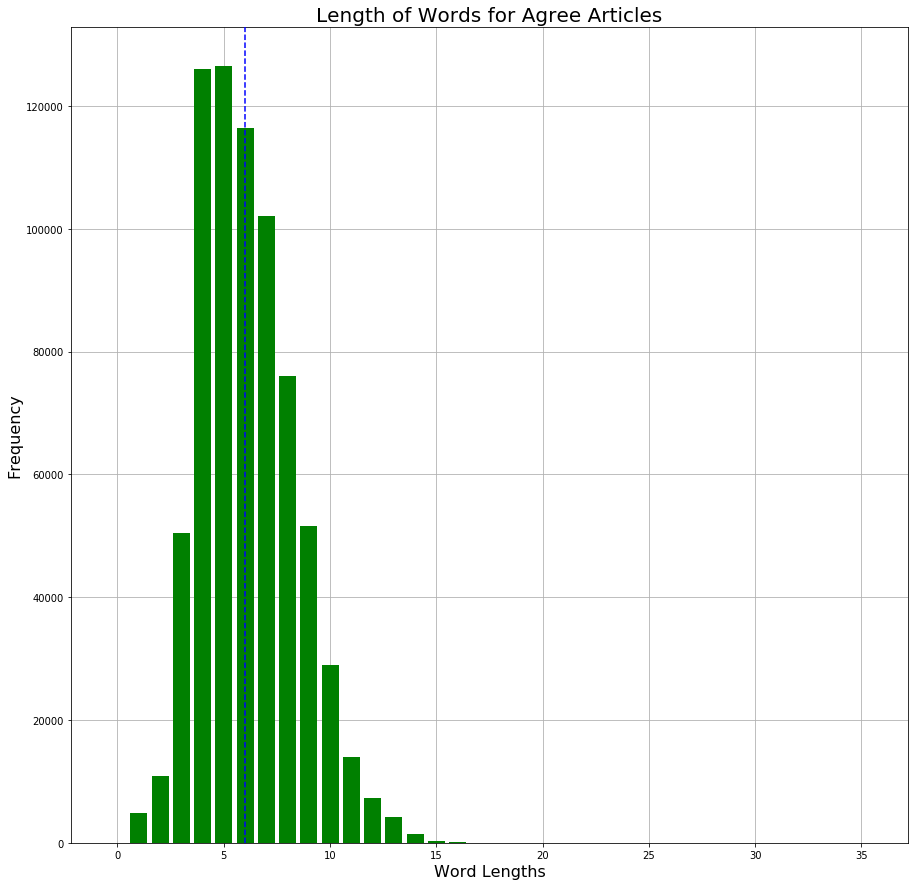

In [26]:
plt.figure(figsize=(15,15))
plt.bar(list(agree_length.keys()), agree_length.values(), color='green', zorder=3)

plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Word Lengths', fontsize = 16)

plt.axvline(find_weighted_median(agree_length), color='b', linestyle='--', zorder=5)
plt.grid(zorder=0)
plt.title('Length of Words for Agree Articles', fontsize = 20);

In [12]:
disagree_words = list(disagree_dict.keys())

disagree_word_len = [(len(word)) for word in disagree_words]
print(max(disagree_word_len))

disagree_words_freq = list(disagree_dict.values())

disagree_word_length = dict(zip(disagree_words,disagree_word_len))

disagree_length = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 
                11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0,
                21:0, 22:0, 23:0, 24:0, 25:0, 26:0, 27:0}
for word in disagree_dict:
    disagree_length[disagree_word_length[word]] += disagree_dict[word]

27


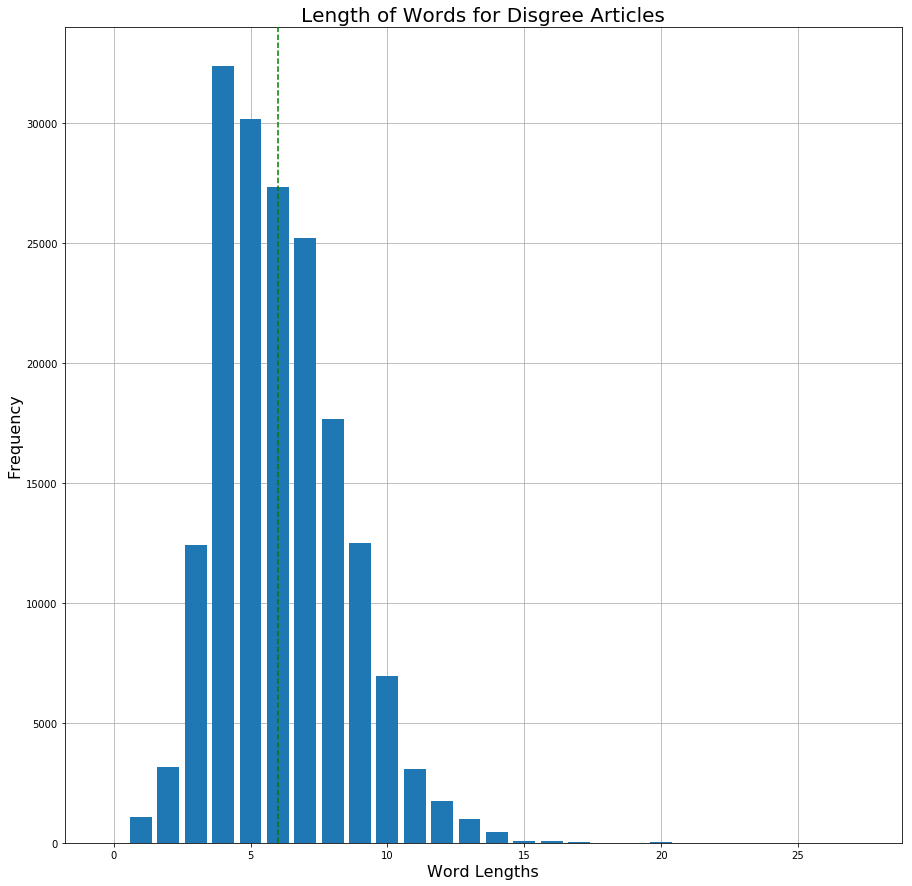

In [27]:
plt.figure(figsize=(15,15))
plt.bar(list(disagree_length.keys()), disagree_length.values(), zorder=3)

plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Word Lengths', fontsize = 16)

plt.axvline(find_weighted_median(disagree_length), color='g', linestyle='--', zorder=5)
plt.grid(zorder=0)
plt.title('Length of Words for Disgree Articles', fontsize = 20);